In [11]:
import numpy as np
import json, os
import matplotlib.pyplot as plt
#!pip install plotly --upgrade
import plotly 
import plotly.graph_objects as go
from utils import data_utils

In [13]:
lookahead_list = [2, 4, 8, 10]
        
mymodel10 = {}
in_n = 10
for lookahead in lookahead_list:
    with open(os.path.join('results/', f'dict_in{in_n}_out{lookahead}.json')) as f:
        mymodel10[lookahead] = json.load(f)
        
actions = data_utils.define_actions('all')

x_label_actions = [action for action in actions for _ in range(len(lookahead_list))]
x_label_lookahead = [l for a in actions for l in lookahead_list]


mymodel10_errors_short_term = [mymodel10[lookahead][action] for action in actions for lookahead in lookahead_list]
mymodel10_errors_short_term_average = [mymodel10[lookahead]['overall'] for lookahead in lookahead_list]

galasso_errors_short_term = '10.7 16.9 29.1 32.9 6.8 11.3 22.6 25.4 7.2 11.6 22.3 25.8 9.8 16.8 33.4 40.2 7.4 13.5 29.2 34.7 \
                12.4 21.8 42.1 49.2 8.2 13.7 26.9 30.9 9.9 18.0 38.2 45.6 11.9 21.3 42.0 48.7 9.1 15.1 29.9 35.0 14.4 \
                23.7 41.9 47.9 8.2 14.2 29.7 33.6 8.6 14.7 29.6 35.2 17.6 29.4 52.6 59.6 8.6 14.3 26.5 30.5'

galasso_errors_short_term = galasso_errors_short_term.strip().split(' ')

galasso_errors_short_term = [float(i.strip()) for i in galasso_errors_short_term if i != '']

galasso_errors_short_term_average = [10.1, 17.1, 33.1, 38.3]

In [14]:
color_a = 'lightblue'
color_b = 'blue'

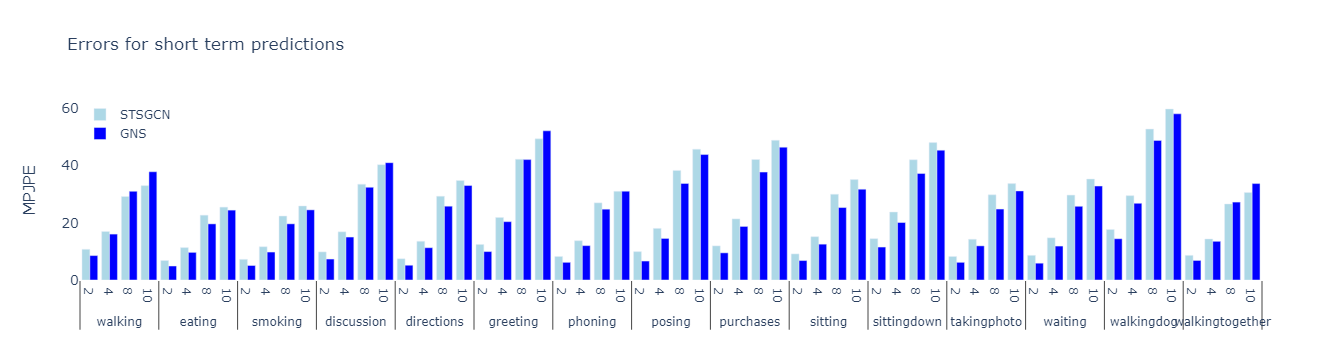

In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(x=[x_label_actions, x_label_lookahead], 
                     y=galasso_errors_short_term,
                    name='STSGCN',
                    marker_color=color_a
                    ))

fig.add_trace(go.Bar(x=[x_label_actions, x_label_lookahead], 
                     y=mymodel10_errors_short_term,
                    name='GNS',
                    marker_color=color_b
                    ))


fig.update_layout(
    title='Errors for short term predictions',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='MPJPE',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    barmode='group',
    bargap=0.2, # gap between bars of adjacent location coordinates.
    bargroupgap=0.0 # gap between bars of the same location coordinate.
)
fig.show()

In [16]:
lookahead_list = [14, 18, 22, 25]
        
mymodel10 = {}
in_n = 10
for lookahead in lookahead_list:
    with open(os.path.join('results/', f'dict_in{in_n}_out{lookahead}.json')) as f:
        mymodel10[lookahead] = json.load(f)
        
actions = data_utils.define_actions('all')

x_label_actions = [action for action in actions for _ in range(len(lookahead_list))]
x_label_lookahead = [l for a in actions for l in lookahead_list]

mymodel10_errors_long_term = [mymodel10[lookahead][action] for action in actions for lookahead in lookahead_list]

mymodel10_errors_long_term_average = [mymodel10[lookahead]['overall'] for lookahead in lookahead_list]

galasso_errors_long_term = '40.6 45.0 48.0 51.8 33.9 40.2 46.2 52.4 33.6 39.6 45.4 50.0 53.4 63.6 72.3 78.8 \
                47.6 56.5 64.5 71.0 64.8 76.3 85.5 91.6 41.8 51.1 59.3 66.1 64.3 79.3 94.5 106.4 63.7 74.9 86.2 93.5 47.7 57.0 67.4 75.2 \
                63.3 73.9 86.2 94.3 47.0 57.4 67.2 76.9 47.3 56.8 66.1 72.0 74.7 85.7 96.2 102.6 38.9 44.0 48.2 51.1 50.8 60.1 68.9 75.6'

galasso_errors_long_term = galasso_errors_long_term.strip().split(' ')

galasso_errors_long_term = [float(i.strip()) for i in galasso_errors_long_term if i != '']

galasso_errors_long_term_average = [50.8, 60.1, 68.9, 75.6]

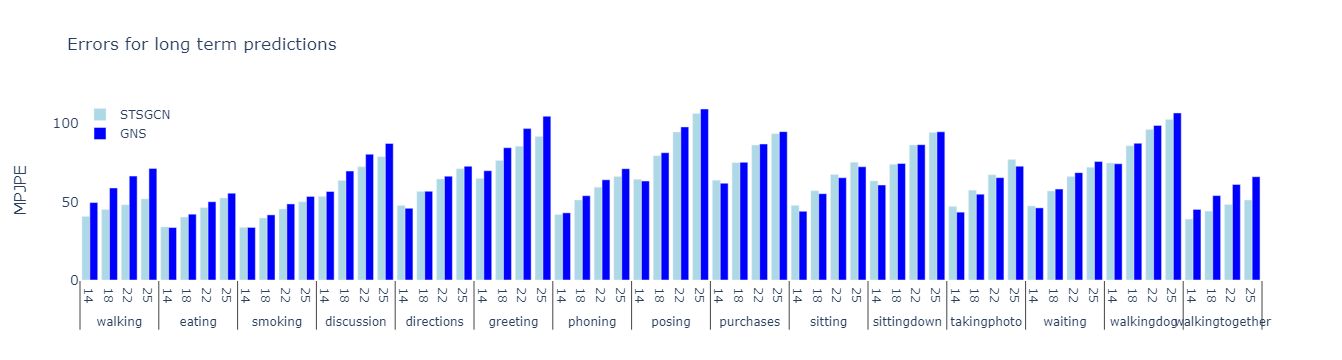

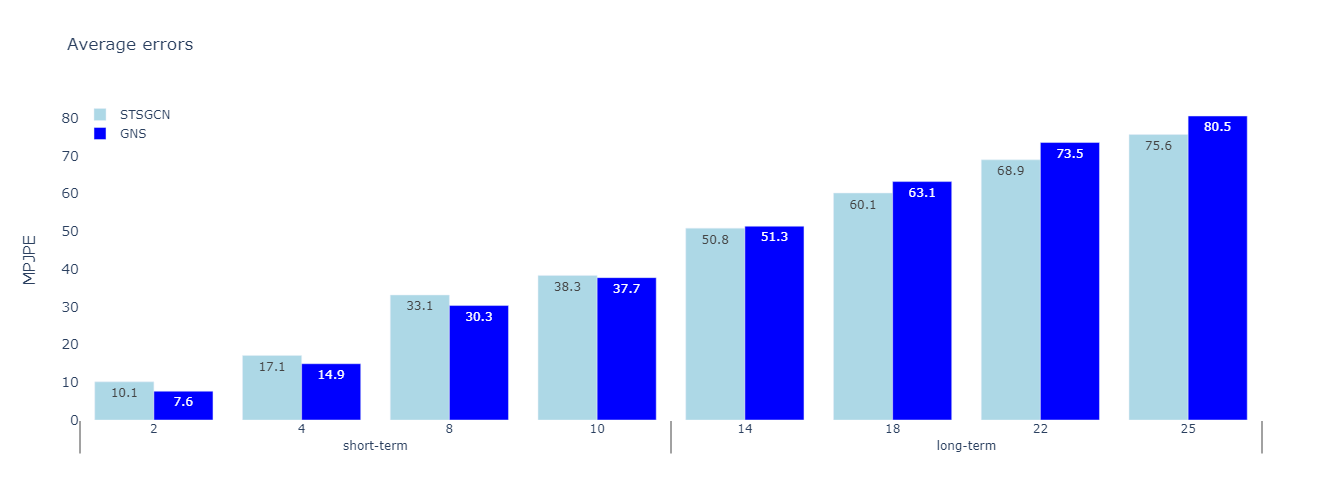

In [17]:
fig = go.Figure()

fig.add_trace(go.Bar(x=[x_label_actions, x_label_lookahead], 
                     y=galasso_errors_long_term,
                    name='STSGCN',
                    marker_color=color_a
                    ))

fig.add_trace(go.Bar(x=[x_label_actions, x_label_lookahead], 
                     y=mymodel10_errors_long_term,
                    name='GNS',
                    marker_color=color_b
                    ))


fig.update_layout(
    title='Errors for long term predictions',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='MPJPE',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    barmode='group',
    bargap=0.2, # gap between bars of adjacent location coordinates.
    bargroupgap=0.0 # gap between bars of the same location coordinate.
)
fig.show()



all_lookahead =  [2,4,8,10,14,18,22,25]
galasso_errors_short_term_average.extend(galasso_errors_long_term_average)
mymodel10_errors_short_term_average.extend(mymodel10_errors_long_term_average)


fig = go.Figure()

fig.add_trace(go.Bar(x=[['short-term']*4 + ['long-term']*4, [str(i) for i in all_lookahead]], 
                     y=galasso_errors_short_term_average,
                    name='STSGCN',
                    marker_color=color_a,
                     text=galasso_errors_short_term_average
                    ))

fig.add_trace(go.Bar(x=[['short-term']*4 + ['long-term']*4, [str(i) for i in all_lookahead]], 
                     y=mymodel10_errors_short_term_average,
                    name='GNS',
                    marker_color=color_b,
                      text=[round(i,1) for i in mymodel10_errors_short_term_average]
                    ))
fig.update_layout(
    title='Average errors',
    xaxis_tickfont_size=12,
    yaxis=dict(
        title='MPJPE',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    autosize=False,
    width=800,
    height=500,
    
    barmode='group',
    bargap=0.2, # gap between bars of adjacent location coordinates.
    bargroupgap=0.0 # gap between bars of the same location coordinate.
)
fig.show()

In [7]:
os.getcwd()

'/workspace/AML/PoseForecasting'